### Importing the pre-requisite library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

### Load the movie lens dataset i.e loading the u.data having rating

In [2]:
raw_file_path = '/Users/vishalsaxena/Documents/DS_Workspace/ds_bootcamp/data/raw/ml-100k/'

In [3]:
columns_names = 'user id | item id | rating | timestamp'
ratings_df = pd.read_csv(os.path.join(raw_file_path, 'u.data'), sep='\t', names=columns_names.split(' | '))
ratings_df.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
ratings_df.drop(columns = 'timestamp', inplace=True)
ratings_df

,user id,item id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


### Identifying Chardet of u.item file

In [5]:
import chardet
with open(os.path.join(raw_file_path, 'u.item'), 'rb') as file:
    charset = chardet.detect(file.read(80000))
charset

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

### Loading the u.item dataset have movies dataset

In [6]:
column_names = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children\'s | Comedy | Crime | Documentary | Drama | Fantasy |  Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
movies_df = pd.read_csv(os.path.join(raw_file_path, 'u.item'), 
                     sep='|', names=column_names.split(' | '), 
                     encoding='ISO-8859-1')
movies_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movies_df.iloc[408,:]

movie id                                                         409
movie title                                              Jack (1996)
release date                                             07-Aug-1996
video release date                                               NaN
IMDb URL              http://us.imdb.com/M/title-exact?Jack%20(1996)
unknown                                                            0
Action                                                             0
Adventure                                                          0
Animation                                                          0
Children's                                                         0
Comedy                                                             1
Crime                                                              0
Documentary                                                        0
Drama                                                              1
Fantasy                           

### Loading the u.user dataset have user dataset

In [8]:
column_names = 'user id | age | gender | occupation | zip code'
users_df = pd.read_csv(os.path.join(raw_file_path, 'u.user'), sep='|', names=column_names.split(' | '))
users_df.head()
users_df['user id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 943 entries, 0 to 942
Series name: user id
Non-Null Count  Dtype
--------------  -----
943 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB


### Univariate plots of rating with count

In [9]:
x = ratings_df.rating.value_counts()
x.values

array([34174, 27145, 21201, 11370,  6110])

In [10]:
x.index

Index([4, 3, 5, 2, 1], dtype='int64', name='rating')

In [11]:
type(x.index)

pandas.core.indexes.base.Index

In [12]:
x.index

Index([4, 3, 5, 2, 1], dtype='int64', name='rating')

<Axes: xlabel='rating', ylabel='count'>

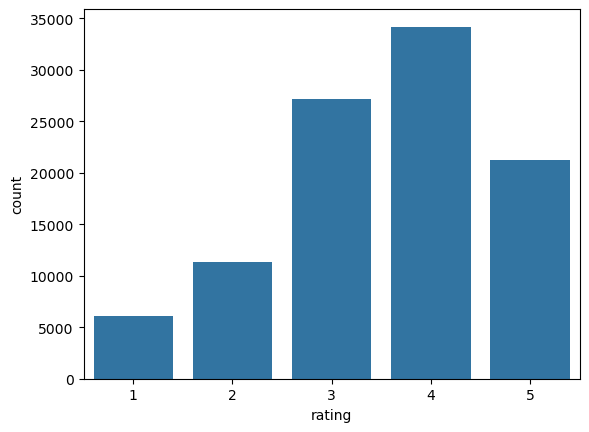

In [13]:
sns.barplot(data=x)

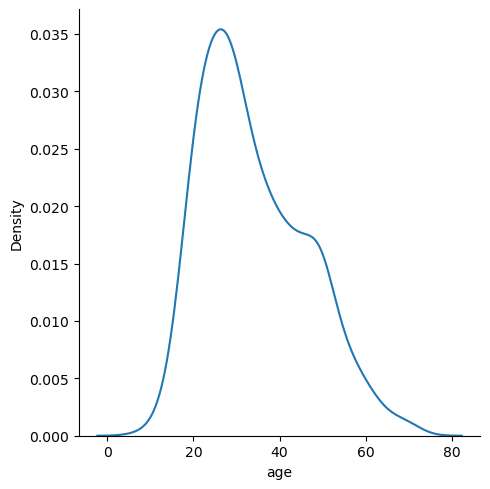

In [14]:
sns.displot(users_df['age'], kind='kde')

### Univariate (distribution) plot of user age

/var/folders/jx/cc9brgl143z9wt4bc65wylz40000gn/T/ipykernel_77194/2327380476.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_df['age'])


<Axes: xlabel='age', ylabel='Density'>

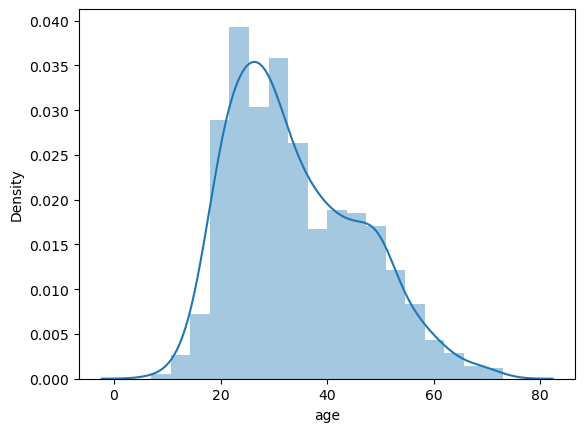

In [15]:
sns.distplot(users_df['age'])

<Axes: xlabel='age', ylabel='Density'>

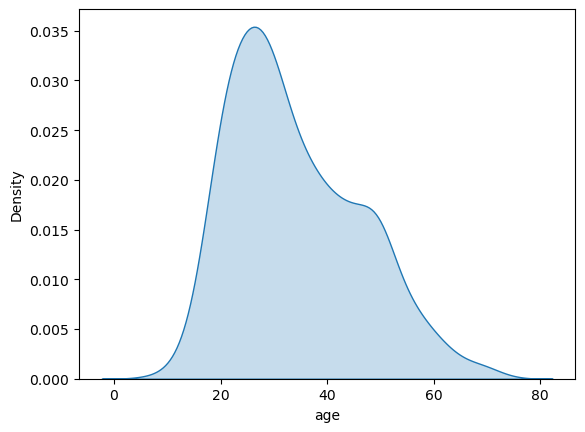

In [16]:
sns.kdeplot(users_df['age'], fill=True)

In [17]:
movies_df['release year'] = movies_df['release date'].str.split('-', expand=True)[2]
movies_df['release year'].isna().sum()

np.int64(1)

In [18]:
x = movies_df['release year'].value_counts()

/var/folders/jx/cc9brgl143z9wt4bc65wylz40000gn/T/ipykernel_77194/994747922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies_df['release year'].value_counts())


<Axes: xlabel='count', ylabel='Density'>

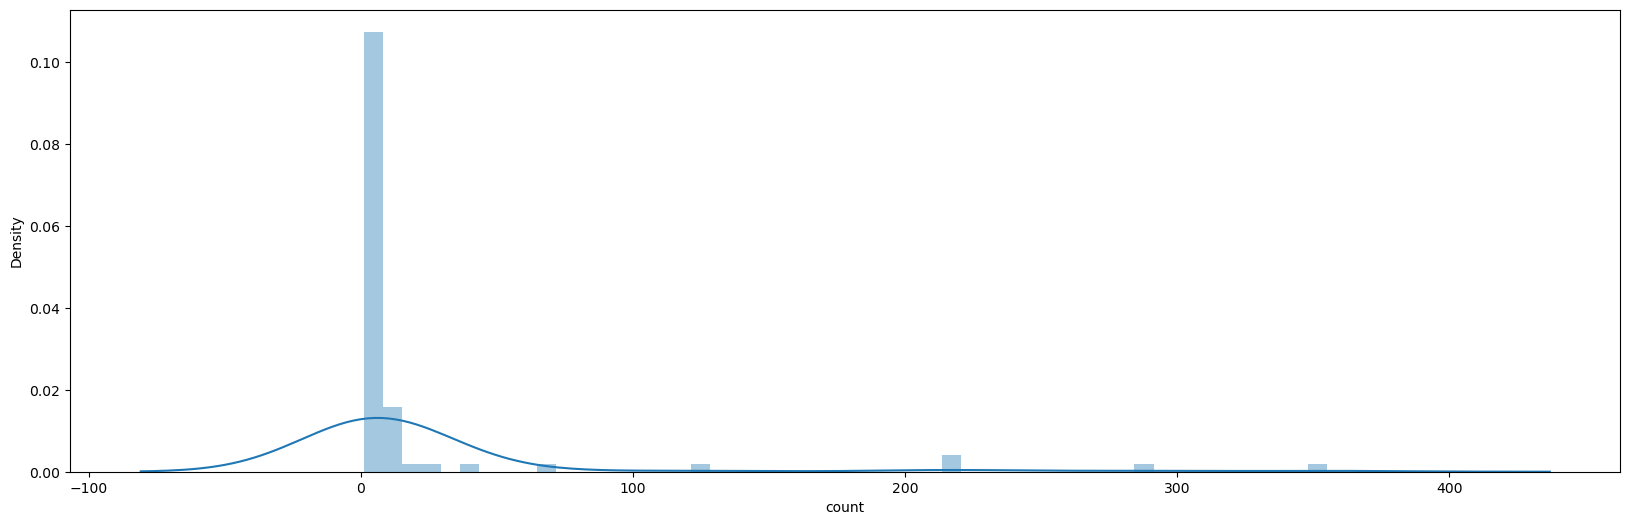

In [19]:
plt.figure(figsize=(20,6)) 
sns.distplot(movies_df['release year'].value_counts())

<Axes: ylabel='release year'>

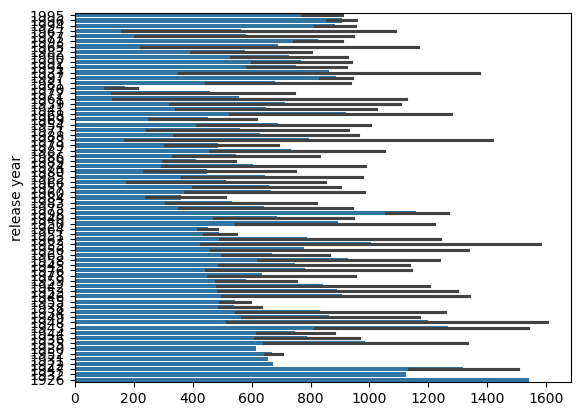

In [20]:
sns.barplot(data = movies_df['release year'])

### Univariate count plot of movies release year

In [21]:
movies_df['release year'].value_counts()

release year
1996    355
1997    286
1995    219
1994    214
1993    126
       ... 
1930      1
1931      1
1922      1
1932      1
1926      1
Name: count, Length: 71, dtype: int64

<Axes: xlabel='release year', ylabel='count'>

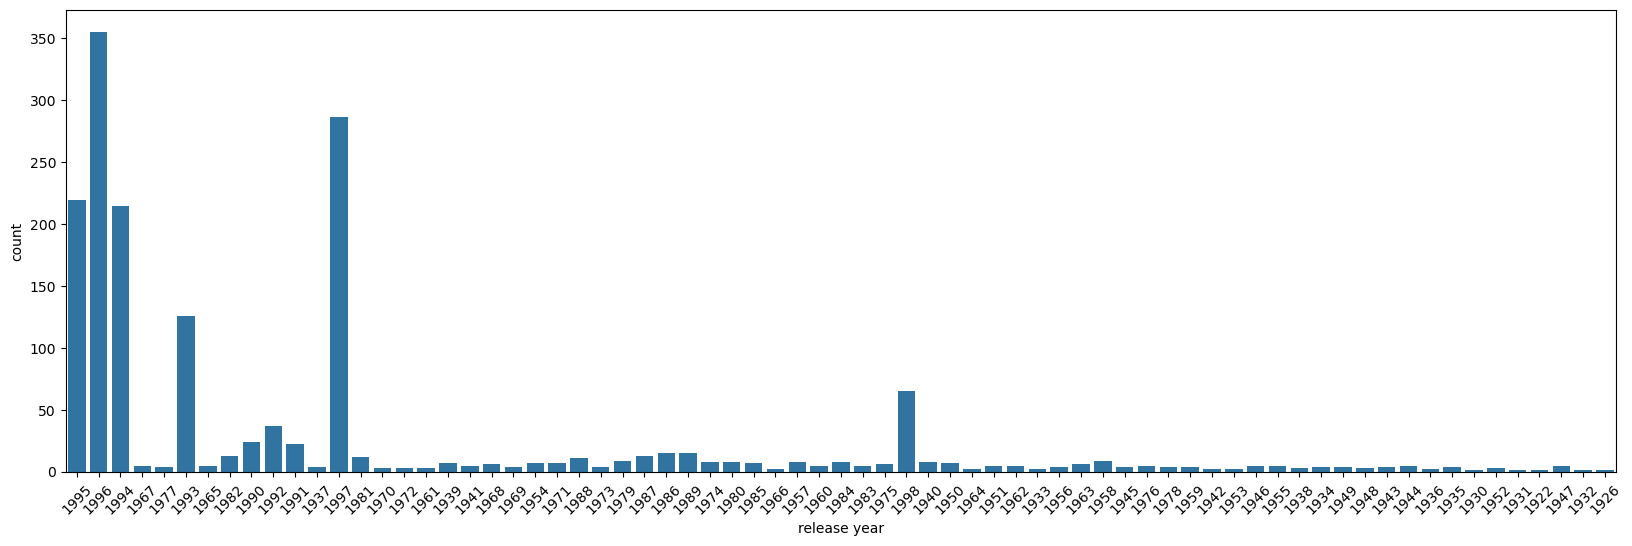

In [22]:
plt.figure(figsize=(20,6)) 
plt.xticks(rotation=45)
sns.countplot(data = movies_df, x='release year')

### Univariate count plot of gender

<Axes: xlabel='gender', ylabel='count'>

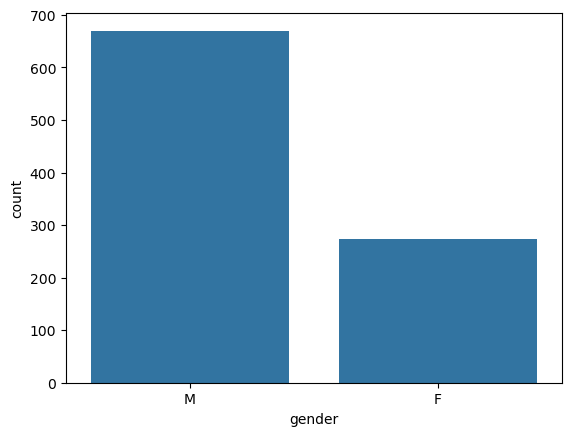

In [23]:
sns.countplot(data=users_df, x='gender')

### Univariate distribution plot for occupation

<Axes: xlabel='occupation', ylabel='count'>

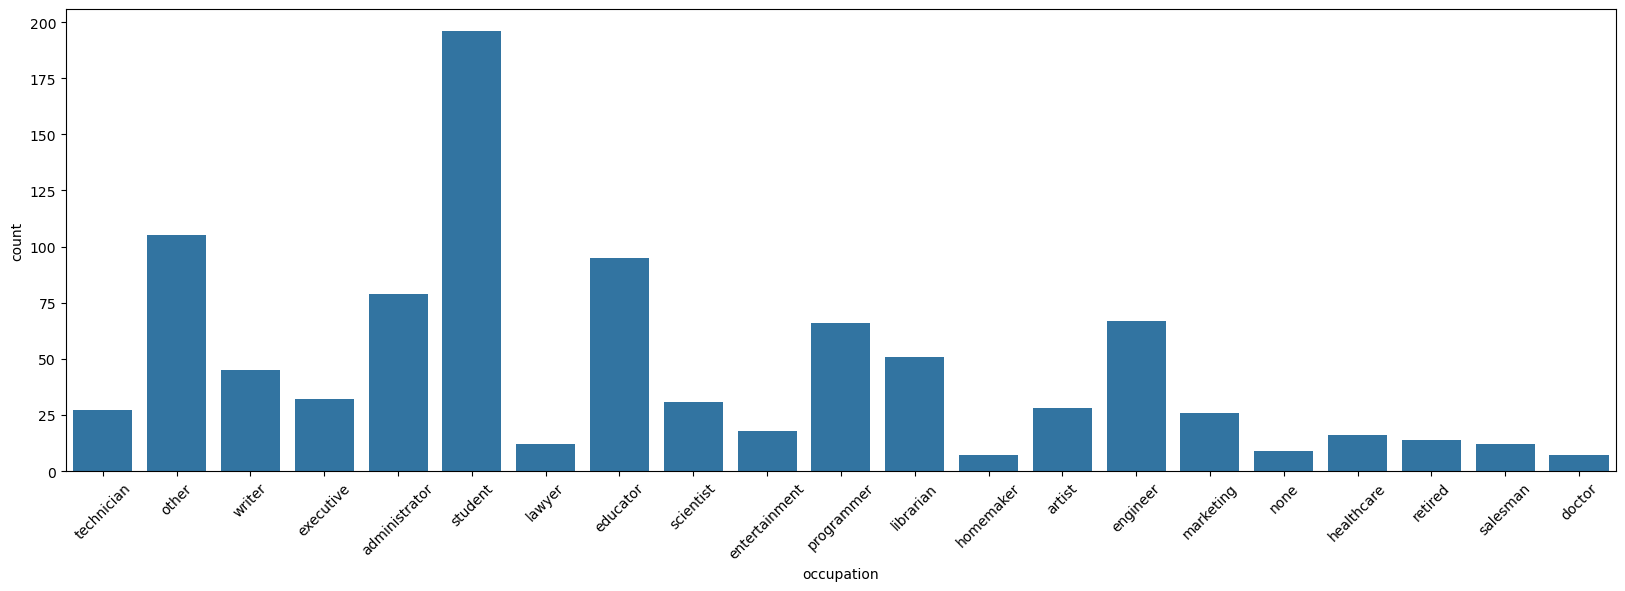

In [24]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
sns.countplot(data=users_df, x='occupation')

### Popularity of genres has changed over the years

In [25]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15   Film-Noir          1682 non-null   int64  
 16  Horror

In [26]:
# dropping unnecessary columns
new_movies_df = movies_df.drop(columns=['video release date', 'IMDb URL', 'movie id', 'unknown', 'movie title', 'release date'])
new_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Action        1682 non-null   int64 
 1   Adventure     1682 non-null   int64 
 2   Animation     1682 non-null   int64 
 3   Children's    1682 non-null   int64 
 4   Comedy        1682 non-null   int64 
 5   Crime         1682 non-null   int64 
 6   Documentary   1682 non-null   int64 
 7   Drama         1682 non-null   int64 
 8   Fantasy       1682 non-null   int64 
 9    Film-Noir    1682 non-null   int64 
 10  Horror        1682 non-null   int64 
 11  Musical       1682 non-null   int64 
 12  Mystery       1682 non-null   int64 
 13  Romance       1682 non-null   int64 
 14  Sci-Fi        1682 non-null   int64 
 15  Thriller      1682 non-null   int64 
 16  War           1682 non-null   int64 
 17  Western       1682 non-null   int64 
 18  release year  1681 non-null   object
dtypes: int

In [27]:
genre_by_year = new_movies_df.groupby('release year').sum().T
genre_by_year

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


<Axes: xlabel='release year'>

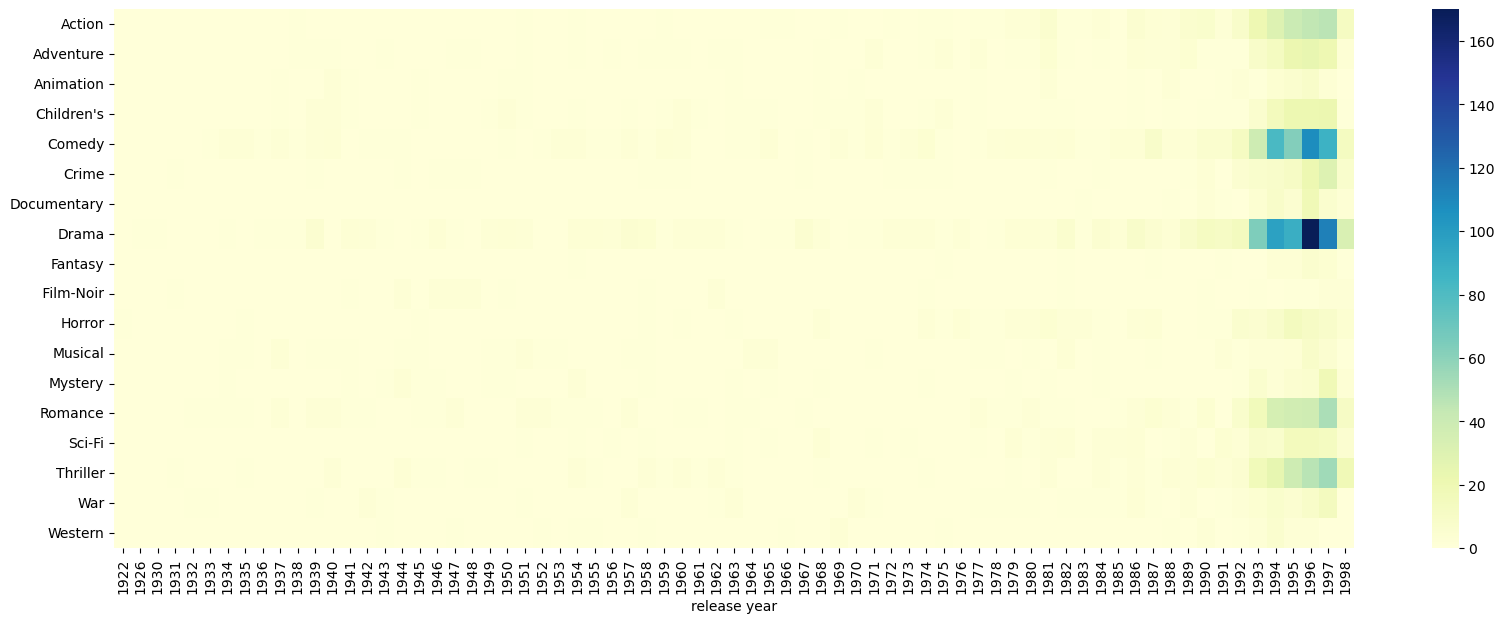

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(genre_by_year, cmap='YlGnBu')

### Top 25 movies by average rating

In [29]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user id  100000 non-null  int64
 1   item id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [30]:
items = ratings_df.groupby('item id').count()
items

,user id,rating
item id,,
1,452,452
2,131,131
3,90,90
4,209,209
5,86,86
...,...,...
1678,1,1
1679,1,1
1680,1,1


In [31]:
items = items[items['user id'] > 100]
items

,user id,rating
item id,,
1,452,452
2,131,131
4,209,209
7,392,392
8,219,219
...,...,...
926,101,101
928,104,104
1016,137,137


In [32]:
items.index

Index([   1,    2,    4,    7,    8,    9,   11,   12,   13,   14,
       ...
        815,  845,  866,  879,  895,  926,  928, 1016, 1028, 1047],
      dtype='int64', name='item id', length=334)

In [33]:
items = ratings_df.loc[ratings_df['item id'].isin(items.index)]
items

,user id,item id,rating
0,196,242,3
1,186,302,3
4,166,346,1
5,298,474,4
6,115,265,2
...,...,...,...
99993,913,209,2
99995,880,476,3
99996,716,204,5
99998,13,225,2


In [34]:
items = items.groupby('item id').mean()
items

,user id,rating
item id,,
1,477.011062,3.878319
2,492.007634,3.206107
4,469.497608,3.550239
7,445.369898,3.798469
8,454.675799,3.995434
...,...,...
926,455.405941,2.702970
928,522.548077,3.115385
1016,473.518248,3.459854


In [35]:
items = items.sort_values('rating', ascending=False)

In [36]:
items

,user id,rating
item id,,
408,443.142857,4.491071
318,469.714765,4.466443
169,454.483051,4.466102
483,471.831276,4.456790
64,441.187279,4.445230
...,...,...
358,496.097902,2.615385
260,462.204724,2.574803
325,443.171875,2.546875


In [37]:
items.drop(columns = 'user id', inplace=True)

In [38]:
ratings_list = items['rating'][0:25]
type(ratings_list)

pandas.core.series.Series

In [39]:
ratings_list_df = ratings_list.reset_index()
ratings_list_df

,item id,rating
0,408,4.491071
1,318,4.466443
2,169,4.466102
3,483,4.456790
4,64,4.445230
5,603,4.387560
6,12,4.385768
7,50,4.358491
8,178,4.344000
9,134,4.292929


In [41]:
ratings_list_df.columns = ['movie id', 'avg_rating']
ratings_list_df

,movie id,avg_rating
0,408,4.491071
1,318,4.466443
2,169,4.466102
3,483,4.456790
4,64,4.445230
5,603,4.387560
6,12,4.385768
7,50,4.358491
8,178,4.344000
9,134,4.292929


In [42]:
merged_df = pd.merge(ratings_list_df, movies_df, on='movie id')
merged_df

,movie id,avg_rating,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,408,4.491071,"Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1996
1,318,4.466443,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1993
2,169,4.466102,"Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1993
3,483,4.456790,Casablanca (1942),01-Jan-1942,NaN,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1942
4,64,4.445230,"Shawshank Redemption, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Shawshank%20R...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
5,603,4.387560,Rear Window (1954),01-Jan-1954,NaN,http://us.imdb.com/M/title-exact?Rear%20Window...,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1954
6,12,4.385768,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
7,50,4.358491,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,...,0,0,0,0,1,1,0,1,0,1977
8,178,4.344000,12 Angry Men (1957),01-Jan-1957,NaN,http://us.imdb.com/M/title-exact?12%20Angry%20...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1957
9,134,4.292929,Citizen Kane (1941),01-Jan-1941,NaN,http://us.imdb.com/M/title-exact?Citizen%20Kan...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1941


In [43]:
top_25_movies = merged_df[['movie id', 'movie title', 'avg_rating']]
top_25_movies

,movie id,movie title,avg_rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


### See gender distribution accross different genres
### Verify the following:

### Men watch more drama than women
### Women watch more Sci-Fi than men

In [44]:
users_df.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [45]:
ratings_df.columns

Index(['user id', 'item id', 'rating'], dtype='object')

In [46]:
movies_df.columns

Index(['movie id', 'movie title', 'release date', 'video release date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', ' Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'release year'],
      dtype='object')

In [47]:
result = pd.merge(users_df, ratings_df, on='user id')
result

,user id,age,gender,occupation,zip code,item id,rating
0,1,24,M,technician,85711,61,4
1,1,24,M,technician,85711,189,3
2,1,24,M,technician,85711,33,4
3,1,24,M,technician,85711,160,4
4,1,24,M,technician,85711,20,4
...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1
99996,943,22,M,student,77841,219,4
99997,943,22,M,student,77841,796,3
99998,943,22,M,student,77841,739,4


In [49]:
result.rename(columns={'item id': 'movie id'}, inplace=True)

In [50]:
result = pd.merge(result, movies_df, on='movie id')
result

,user id,age,gender,occupation,zip code,movie id,rating,movie title,release date,video release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,61,4,Three Colors: White (1994),01-Jan-1994,NaN,...,0,0,0,0,0,0,0,0,0,1994
1,1,24,M,technician,85711,189,3,"Grand Day Out, A (1992)",01-Jan-1992,NaN,...,0,0,0,0,0,0,0,0,0,1992
2,1,24,M,technician,85711,33,4,Desperado (1995),01-Jan-1995,NaN,...,0,0,0,0,1,0,1,0,0,1995
3,1,24,M,technician,85711,160,4,Glengarry Glen Ross (1992),01-Jan-1992,NaN,...,0,0,0,0,0,0,0,0,0,1992
4,1,24,M,technician,85711,20,4,Angels and Insects (1995),01-Jan-1995,NaN,...,0,0,0,0,1,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,"Apple Dumpling Gang, The (1975)",01-Jan-1975,NaN,...,0,0,0,0,0,0,0,0,1,1975
99996,943,22,M,student,77841,219,4,"Nightmare on Elm Street, A (1984)",01-Jan-1984,NaN,...,0,1,0,0,0,0,0,0,0,1984
99997,943,22,M,student,77841,796,3,Speechless (1994),01-Jan-1994,NaN,...,0,0,0,0,1,0,0,0,0,1994
99998,943,22,M,student,77841,739,4,Pretty Woman (1990),01-Jan-1990,NaN,...,0,0,0,0,1,0,0,0,0,1990


In [53]:
genre_by_gender = result.groupby('gender').sum().loc[:,'Action':'Western']

In [54]:
genre_by_gender

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [55]:
genre_by_gender['total'] = genre_by_gender.sum(axis=1)
genre_by_gender

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [58]:
genre_by_gender = genre_by_gender.div(genre_by_gender.total, axis=0)*100
genre_by_gender.T

gender,F,M
Action,10.133889,12.680320
Adventure,5.849053,6.679087
Animation,1.852852,1.642708
Children's,4.156347,3.115480
Comedy,15.023929,13.698044
Crime,3.340720,3.940611
Documentary,0.348224,0.359382
Drama,20.498687,18.181189
Fantasy,0.675965,0.622467
Film-Noir,0.716933,0.848418
